# Solanki, Shivam - Homework 1

### Submission
Replace Last Name, First Name above with your name. When you complete this homework, please click "File" -> "Print Preview". Print the resulting browser tab (double check that all code / markdown is there and that plots are visible). Submit a physical copy of your homework **in class on Wednesday 30th January**.

### R versus Python
You may complete this homework in either R or python. The current notebook is written in R. If you are completing your homework in R, you can simply modify this notebook with your answers. If you are completing your homework in python, initiate a Jupyter python notebook and write your answers there.

### Background Reading for Problems
- Section 22.1 - 22.5 in "Numerical Analysis" by Lange.

## Question 1: Inverse Method for geometric random variates

1. Using the inverse method and the language $Unif[0,1]$ generator (runif in R, numpy.random.uniform in python), write a function to generate random variates from a geometric distribution with probability of success $p$. Both $p$ and the number of random variates should be arguments to your function. There are multiple ways of defining the geometric distribution, here please use the definition that it is the number of *failures* until the first success.
2. For some particular $p$ of your choosing, make a plot of the proportion of random variates taking each value and plot the true geometric probability mass function on top to confirm that the generator is working.
3. Compare the speed of your geometric generator to the language generator (rgeom in R, numpy.random.geometric in python). Try to make your generator computationally competitive with the built in generator by avoiding for loops and other slow code.
4. How do you think your method would compare to an approach that generates a sequence of random trials with probability $p$ of success until the first success and then records the number of failures until the first success? Why?

In [1]:
# Answer 1.1

#Generating random variates using inverse method and
#uniform random generator
import numpy as np
import math
def inv_geo(p, n):
    '''
    args: p = probability
          n = number of random variates
    Return: n random variates from a geometric 
    distribution with pobability of success p
    '''
    U = np.random.uniform(0, 1, size=n)
    X = np.log(U)/np.log(1-p)
    x = [math.ceil(i) for i in X]
    return x 

In [2]:
inv_geo(0.35,10)

[1, 1, 1, 2, 3, 2, 3, 1, 1, 2]

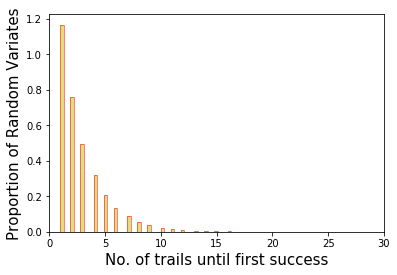

In [3]:
# Answer 1.2

%matplotlib inline 
import matplotlib.pyplot as plt

kwargs = dict(density=True,alpha=0.5, bins=100)
x = inv_geo(0.35, 1000000)
y = np.random.geometric(0.35, 1000000)
num = np.arange(1,101)
plt.hist(x, color= "y", histtype='stepfilled', **kwargs);
plt.hist(y, color= "r", histtype='step', **kwargs);
plt.xlim([0,30]);
plt.xlabel("No. of trails until first success", fontsize= 15);
plt.ylabel("Proportion of Random Variates", fontsize= 15);

In [4]:
%%timeit
# Answer 1.3

#Using Python's random number generator
import numpy as np
z = np.random.geometric(p=0.35, size=10)

4.17 µs ± 25.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [5]:
%%timeit
inv_geo(0.35,10)

21.2 µs ± 276 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [6]:
%%timeit
# Answer 1.4 

def bern_geo(p):
    '''
    args: p = probability  of success until the first success
    Return: k = number of trials untils first success
    '''
    from scipy.stats import bernoulli
    k = 1
    while bernoulli.rvs(p, size =1) == 0:
        k += 1
    return k 

bern_geo(0.60)

The slowest run took 9.37 times longer than the fastest. This could mean that an intermediate result is being cached.
347 µs ± 311 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Question 2: Simulation Study of the LLN and CLT

1. Create an $n \times m$ matrix $X$ with $n=100$ and $m=1000$ and each entry $X_{ij} \sim \text{Exp}(\lambda)$ (rexp in R, numpy.random.exponential in python). Set the rate parameter to be $\lambda=0.5$ so that the mean of $X_{ij}$ is $2$. (Again, beware that there are multiple ways of parameterizing the exponential distribution and python does it differently to R). <br>If you would like some intuition for this simulation consider the following situation: we survey $100$ bus stops in a city, and at each bus stop, we measure the waiting times between each bus until the stop has been visited by $1000$ buses. The exponential distribution is often used to model waiting times (bus arrival times, next stock trade, store visits, website visits, product lifetimes etc.). In this simple simulation study, we suppose that the waiting times are the same at each bus stop and throughout the day. 
2. Compute the running mean of each row of $X$ to produce a new matrix $Y$ which is again $100 \times 1000$. Specifically the row $i$, column $k$ entry of $Y$ is
\begin{equation*}
Y_{ik} = \frac{1}{k} \sum_{j=1}^k X_{ij}
\end{equation*}
Try to avoid using nested for loops.
3. Plot each row of $Y$ (on the y-axis) against the column number (on the x-axis). This will result in 1 plot with 100 lines. Then make three histograms 1) first column of $Y$, 2) 20th column of $Y$, and 3) the last column of $Y$. Your images should roughly look like what is below. (If you want to make the results clearer and prettier, draw all histograms or density estimators on top of each other with different colors, see lecture notes from the first class [here](https://nbviewer.jupyter.org/urls/david-jones-statistics.github.io/statcomp/lectures/topic1-intro/00intro.ipynb) for how to do this with ggplot in R or [here](https://jakevdp.github.io/PythonDataScienceHandbook/04.05-histograms-and-binnings.html) for code in python from VanderPlas)
4. Take the variance of each column of $Y$ to produce a vector $\boldsymbol{u}$ giving the running variance of the means across the $n$ bus stops. Plot $1/\boldsymbol{u}_k$ (on the y-axis) against $k$ (on the x-axis), and add a line showing $k\lambda^2$, for $k=1,\dots,m$. 
5. Explain what the simulation results in parts 3 and 4 are showing.

In [7]:
# Answer 2.1

#Creating 100 by 1000 matrix with random numbers exponentially distributed having mean=2
def exp_matrix(mu,n,m):
    import numpy as np 
    x = np.random.exponential(mu, size=(n, m))
    return x

In [8]:
x = exp_matrix(2,100,1000)
x.shape

(100, 1000)

In [9]:
# Answer 2.2

def running_mean(x,n):
    '''
    args: x = matrix
        n=number of columns in the matrix
    Output: Running mean across each row
    '''
    import numpy as np
    index = np.arange(1,n+1)
    moving_avg = np.cumsum(x,axis=1)/index
    return moving_avg

In [10]:
a = exp_matrix(2,100,1000)
Y = running_mean(a,1000)
Y.shape

(100, 1000)

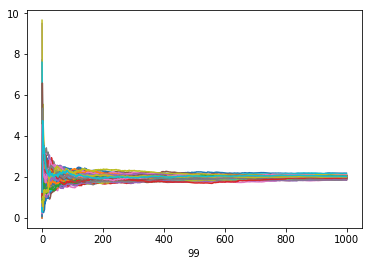

In [11]:
# Answer 2.3

%matplotlib inline 
import matplotlib.pyplot as plt

a = exp_matrix(2,100,1000)
Y = running_mean(a,1000)
for i in range(100):
    plt.plot(Y[i]);
    plt.xlabel(i);

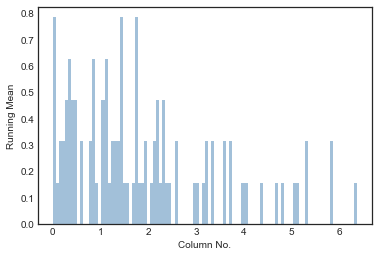

In [12]:
# Answer 2.3

%matplotlib inline 
import matplotlib.pyplot as plt

a = exp_matrix(2,100,1000)
Y = running_mean(a,1000)
plt.style.use('seaborn-white')

kwargs = dict(density=True,alpha=0.5, bins=100, histtype='stepfilled', color='steelblue',edgecolor='none')
plt.hist(Y[:,0], **kwargs);
plt.xlabel("Column No.", fontsize =10);
plt.ylabel("Running Mean", fontsize =10);


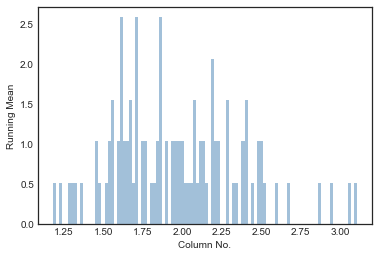

In [13]:
# Answer 2.3

%matplotlib inline 
import matplotlib.pyplot as plt

a = exp_matrix(2,100,1000)
Y = running_mean(a,1000)
global kwargs
plt.hist(Y[:,19], **kwargs);
plt.xlabel("Column No.", fontsize =10);
plt.ylabel("Running Mean", fontsize =10);


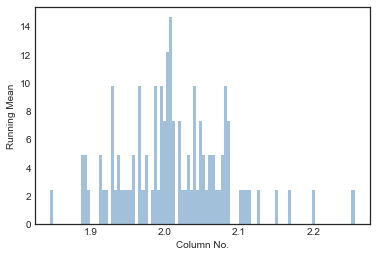

In [14]:
# Answer 2.3

%matplotlib inline 
import matplotlib.pyplot as plt
global kwargs

a = exp_matrix(2,100,1000)
Y = running_mean(a,1000)
plt.hist(Y[:,-1], **kwargs);
plt.xlabel("Column No.", fontsize =10);
plt.ylabel("Running Mean", fontsize =10);

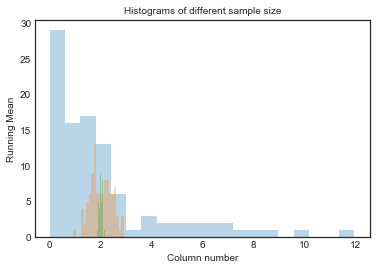

In [15]:
%matplotlib inline 
import matplotlib.pyplot as plt
global kwargs

a = exp_matrix(2,100,1000)
Y = running_mean(a,1000)
p1= Y.T[0]
p2= Y.T[19]
p3= Y.T[-1]

kwargs = dict(histtype='stepfilled', alpha=0.3, density=False, bins=20)

plt.hist(p1, **kwargs, label= "Sample size 1");
plt.hist(p2, **kwargs, label= "Sample size 20");
plt.hist(p3, **kwargs, label= "Sample size 1000");
plt.ylabel("Running Mean", fontsize=10);
plt.xlabel("Column number", fontsize=10);
plt.title("Histograms of different sample size", fontsize=10);

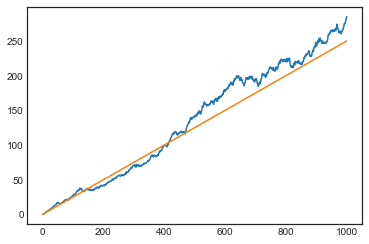

In [16]:
# Answer 2.4

%matplotlib inline 
import matplotlib.pyplot as plt

import numpy as np
a = exp_matrix(2,100,1000)
Y = running_mean(a,1000)
z = np.var(Y, axis=0)
r = np.reciprocal(z)
index = np.arange(1,1001)
plt.plot(index,r);
plt.plot(index*(0.5)**2);

(requires internet connection to view)

<img src="https://david-jones-statistics.github.io/statcomp/hw/hw1_plot1.png">


(requires internet connection to view)

<img src="https://david-jones-statistics.github.io/statcomp/hw/hw1_plot2.png">


## Answer 2.5

According to the law of large number, the average of the results obtained from a large number of trials 
should be close to the expected value, and will tend to become closer as more trials are performed.
So, we can observe from the plot of the running mean that as the number of observation increases,
the sample mean approaches the expected value of the population mean which is 2.0 

The central limit theoram can be observed from the plot as the sample size increases, distribution of sample
means approaches the normal distribution. The shape of the plot changes from exponential distribution to normal distribution
as the sample size increases. 
